# Machine Learning and Statistics 2022 Assessment

Anomaly_detection_V04.ipynb Table of Contents

1. Introduction
    - 1.1 Machine Learning Project Notebook
    - 1.2 What Is TensorFlow?
    - 1.3 What Is Keras?
    - 1.4 Why use Keras?
    - 1.5 Single Neuron
    - 1.6 What is a Reconstruction Convolutional Autoencoder Model?

2. Detect anomalies in a timeseries using an Autoencoder
    - 2.1 Introduction
    - 2.2 Setup
    - 2.3 Load the data
    - 2.4 Prepare training data 
    - 2.5 Create sequences
    - 2.6 Create the Keras layers
    - 2.7 Train the model
    - 2.8 

3. Something
    - 3.1 
    - 3.2 
    - 3.3 
    - 3.4 
4. References 

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

# 1. Introduction

## 1.1 Machine Learning Project Notebook

- On the keras website, there is an example of time-series anomaly detection. Re-create this example in a notebook of your own, explaining the concepts
    - Keras Team. Keras: the python  deep learning api, 2022a. URL https://keras.io/
    - Keras Team. Timeseries anomaly detection using an autoencoder, 2022b. URL https://keras.io/examples/timeseries/timeseries_anomaly_detection/
- Clearly explain each keras function used, referring to the documentation 
- Include an introduction to your notebook, setting the context and describing what the reader can expect as they read down through the notebook.
- Include a conclusion section where you suggest improvements you could make to the analysis in the notebook.
- Pitch all your work at your classmates as the audience. [4]

## 1.2 What Is TensorFlow?

TensorFlow is an open-source end-to-end machine learning framework that is designed to make it easy to build and deploy machine learning models. It is widely used in the field of artificial intelligence and machine learning, and is known for its ability to perform a variety of tasks including deep neural network training and inference.

One of the key features of TensorFlow is its ability to perform symbolic math using dataflow and differentiable programming. This allows users to build machine learning models by constructing computational graphs that represent the relationships between different variables and operations. TensorFlow also provides a range of tools, frameworks, and community resources that can be used to build and deploy machine learning applications.

Overall, TensorFlow is a powerful and widely-used tool for building and deploying machine learning models, and is suitable for a wide range of applications and use cases. [2] 


## 1.3 What Is Keras?

Keras is a high-level deep learning API that is designed to make it easy to build, train, and deploy neural networks. It is written in Python and provides a simple, user-friendly interface for building neural networks, allowing even those with little to no experience in deep learning to get started quickly.

One of the key features of Keras is its flexibility in terms of the backends it can use for computations. It can use multiple backends such as TensorFlow, Theano, or CNTK, allowing users to choose the backend that best fits their needs.

While Keras may not be as fast as some other deep learning frameworks, it is still a powerful tool for building and training neural networks, and is widely used in the field of machine learning and artificial intelligence. 

TensorFlow has adopted Keras as its official high-level API, and Keras is fully integrated with TensorFlow. This allows users to take advantage of the simplicity and user-friendliness of Keras for building and training neural networks, while also having the option to use the TensorFlow Core API for more advanced customizations and fine-tuning.

Using the TensorFlow Core API in conjunction with Keras can provide a powerful combination for building and training neural networks, as it allows users to leverage the high-level abstractions of Keras while also having the flexibility and control of the lower-level TensorFlow Core API.

Overall, both Keras and TensorFlow are widely used in the field of machine learning and artificial intelligence, and are powerful tools for building and training neural networks. [3] [9]

## 1.4 Why use Keras?

1. Keras is an API that was made to be easy to learn for people
2. Prototyping time in Keras is less
3. Keras runs on top of TensorFlow and is relatively fast
4. Documentation and help available are far more extensive than other deep learning frameworks
5. Keras is used commercially by many companies
6. It runs smoothly on both CPU and GPU
7. Supports almost all neural network models.
8. It is modular in nature, which makes it expressive, flexible, and apt for innovative research. [3] [9]


## 1.5 Single Neuron

A single neuron with 3 input connections and 1 output. There is a forward propagate method calculates the output of the neuron, and the back propagate method calculates the error in the output of the neuron and updates the weights.

To train the neural network, you can loop through a set of training examples and forward propagate and back propagate for each example. You can then evaluate the accuracy of the neural network by comparing the output of the neuron to the expected output for each training example. [5]

![Single_Neuron](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/Single_Neuron.svg?raw=true)


## 1.6 What is a Reconstruction Convolutional Autoencoder Model?
A convolutional autoencoder is a type of neural network that is used for unsupervised learning. It is composed of two main parts; an encoder and a decoder. [6] A convolutional autoencoder is a variant of a Convolutional Neural Networks (CNNs) [7] are well-suited for forecasting time-series data because they can take advantage of the temporal relationships between observations in the time-series. [8]

# 2. Detect anomalies in a timeseries using an Autoencoder.

## 2.1 Introduction
This script demonstrates how you can use a reconstruction convolutional autoencoder model to detect anomalies in timeseries data. [1]

## 2.2 Setup


In [115]:
# Excerpt from keras time-series anomaly detection [1]
# Imports

# Numerical arrays
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks refer to 1.3 What Is Keras? and 1.2 What Is TensorFlow? 
import tensorflow.keras as keras

# Python data visualization library
from matplotlib import pyplot as plt

# Python data visualization library based on matplotlib
import seaborn as sns


## 2.3 Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](https://www.kaggle.com/boltzmannbrain/nab) and it's [Numenta Anomaly Benchmark(NAB) github](https://github.com/numenta/NAB) dataset. Numenta Anomaly Benchmark (NAB) is an open-source framework for evaluating the performance of anomaly detection algorithms.[10]  NAB includes a large dataset of real-world time-series data from a variety of sources, such as traffic data, temperature data, and machine performance data. The dataset includes both normal and anomalous data, and the goal of NAB is to provide a standardized way to evaluate the ability of anomaly detection algorithms to identify anomalies in the data. [11]


The [art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/) and [art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/) datasets are time-series datasets that contain data from artificially generated time-series that are ordered, timestamped, single-valued metrics.

The [art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/) dataset without anomaly. 

The [art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/) dataset with anomaly. 

These datasets are intended to be used to evaluate the ability of anomaly detection algorithms to identify anomalies in the data.

Data are ordered, timestamped, single-valued metrics. We will use the `art_daily_small_noise.csv` file for training and the `art_daily_jumpsup.csv` file for testing. The simplicity of this dataset allows us to demonstrate anomaly detection effectively.

In [116]:
# https://peps.python.org/pep-0008/#maximum-line-length
# long blocks of text with fewer structural restrictions 
# (docstrings or comments), the line length should be limited to 72 characters (78 Charactr long + this part is 116)

# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [117]:
# Data Quality and Preprocessing
# Click on the full url
# Verify data  
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [118]:
# Data Quality and Preprocessing
# Click on the full url
# Verify data  
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

### Note: Why use Pandas?

Training a neural network using Keras on datasets stored in Pandas dataframes can have some advantages compared to using other formats. Some advantages include: 
- Dataset versioning
- Combination of multiple datasets
- Multi-task problems [12]

### Note: Data Quality and Preprocessing for Machine Learning Models

It is important to do some **Data Quality and Preprocessing** on your data before sending it to a model for a number of reasons. Checking your data can help you to identify and fix problems or errors in the data that could affect the performance of your model. [27]

Some common issues that you may want to check for include:

- Missing values: If your data has missing values, these can cause problems when you try to fit a model to the data. You may want to check for missing values and decide how to handle them, such as by imputing the missing values or dropping the rows with missing data.

- Outliers: Outliers in your data can have a large impact on the model's predictions, and can sometimes cause the model to fit poorly to the data. You may want to check for outliers and decide whether to remove them from the data or to transform the data to make the outliers less influential.

- Inconsistencies: Inconsistencies in the data, such as incorrect or inconsistent values, can also cause problems when you try to fit a model to the data. You may want to check for inconsistencies and fix them if possible.

- Data quality: The quality of the data can also affect the performance of the model. You may want to check the quality of the data to ensure that it is accurate and reliable. 

### Timeseries data without anomalies

In [119]:
# pandas read in art_daily_small_noise.csv file as df_small_noise
# options 
# parse_dates = pandas will attempt to infer the format of the datetime strings in the columns
# index_col = Column(s) to use as the row labels of the DataFrame, either given as string name or column index [13]
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [120]:
# Data Quality and Preprocessing
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution [14]
# Check count, min, max, mean and std
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [121]:
# Data Quality and Preprocessing
# Check the dimensions
df_small_noise.shape

(4032, 1)

In [122]:
# Data Quality and Preprocessing
# https://www.w3resource.com/pandas/dataframe/dataframe-head.php 
# Print the first 5 rows of df_small_noise dataframe.
# Compare with full url
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [123]:
# Data Quality and Preprocessing
# Check first value using iloc
df_small_noise.iloc[0]['value']

18.3249185392

### Data Quality and Preprocessing
It was noted that the values did not match from github page to pandas dataframe

- github:   18.324918539200002
- pandas:   18.324919
- iloc:     18.3249185392

### Noted 5 decimal place removed

### Timeseries data with anomalies
We will use the following data for testing and see if the sudden jump up in the data is detected as an anomaly.

In [124]:
# pandas read in art_daily_jumpsup.csv file as df_daily_jumpsup
# options 
## parse_dates = pandas will attempt to infer the format of the datetime strings in the columns
## index_col = Column(s) to use as the row labels of the DataFrame, either given as string name or column index [13]
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [125]:
# Data Quality and Preprocessing
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution [14]
# Check count, min, max, mean and std
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [126]:
# Data Quality and Preprocessing
# Check the dimensions
df_daily_jumpsup.shape

(4032, 1)

In [127]:
# Data Quality and Preprocessing
# https://www.w3resource.com/pandas/dataframe/dataframe-head.php 
# Print the first 5 rows of df_small_noise dataframe.
# Compare with full url
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [128]:
# Data Quality and Preprocessing
# Check first value using iloc
df_daily_jumpsup.iloc[0]['value']

19.761251903

### Data Quality and Preprocessing
It was noted that the values did not match from github page to pandas dataframe

- github:   19.761251902999998
- pandas:   19.761252
- iloc:     19.761251903

### Noted 5 decimal place removed, rounded up to 3

### Note: Data Visualization for Machine Learning Models

Data visualization is an integral part of any data science project. Understanding insights using excel spreadsheets or files becomes more difficult when the size of the dataset increases. It’s certainly not fun to scroll up/down to do an analysis. Let’s understand visualization and its importance in machine learning modeling [26]

- Understanding the data: Data visualization can help you to understand the relationships between different variables in the dataset, which can be useful for deciding which variables to include in the model and how to pre-process the data.
- Detecting patterns: Data visualization can help you to detect patterns or trends in the data, which can inform your decisions about which modeling techniques to use.
- Identifying outliers: Data visualization can also help you to identify outliers in the data, which can be useful for deciding whether to remove the outliers or to transform the data to make the outliers less influential.
- Visualizing relationships.

### Plot Timeseries data without anomalies

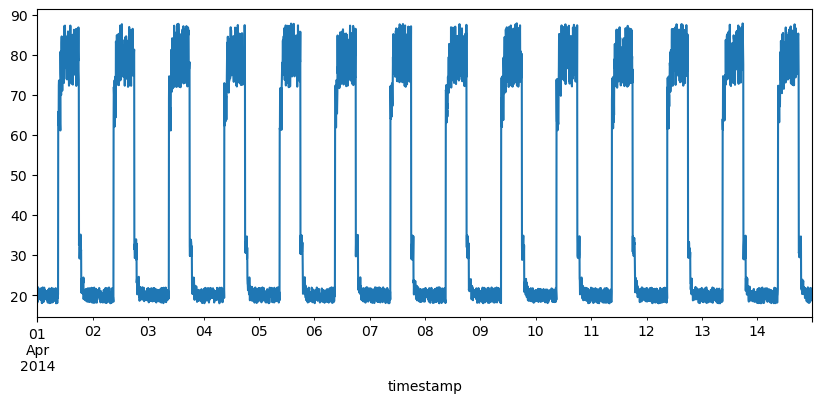

In [129]:
# Data visualization
# Plot df_small_noise dataset timeline
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

### Plot Timeseries data with anomalies

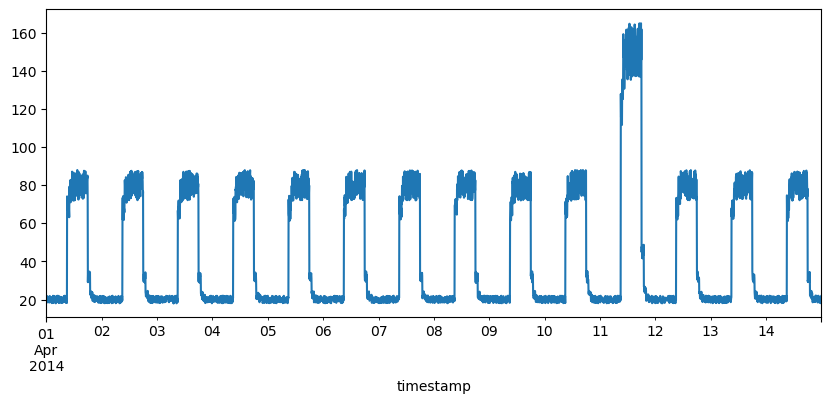

In [130]:
# Plot df_small_noise dataset timeline
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

In [131]:
# Compare the shape of the datasets
df_small_noise.shape == df_daily_jumpsup.shape

True

### Overlay the plots

After reading the data in the shape of the data seems consistant. The two time-series datasets that are plotted on the same graph and you notice that the data is nearly synchronized in the peaks and troughs, but there is a sudden jump in one of the datasets around a specific time.

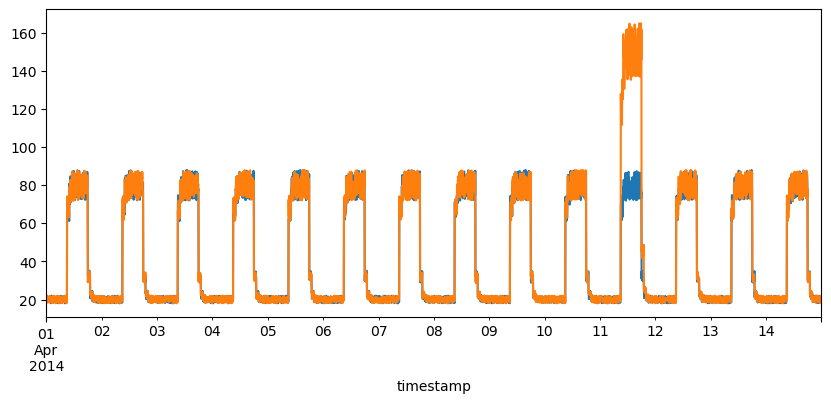

In [132]:
# Compare pandas data fraame and plot [15]
df3 = df_small_noise.compare(df_daily_jumpsup)

# Plot df_small_noise dataset timeline
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df3.plot(legend=False, ax=ax);

### Seaborn pairplot

Both dataframes are merged, and 3 extra columns are using the timestamp data:
- date
- hour
- minute

In [133]:
# Merge the two data frames
df3 = pd.merge(df_small_noise, df_daily_jumpsup, left_index=True, right_index=True)

# Create new column with the date, hour and minute
df3["datetime"] = df3.index
df3["date"] = df3["datetime"].dt.date 
df3["hour"] = df3["datetime"].dt.hour
df3["min"] = df3["datetime"].dt.minute

df3.head()

,value_x,value_y,datetime,date,hour,min
timestamp,,,,,,
2014-04-01 00:00:00,18.324919,19.761252,2014-04-01 00:00:00,2014-04-01,0,0
2014-04-01 00:05:00,21.970327,20.500833,2014-04-01 00:05:00,2014-04-01,0,5
2014-04-01 00:10:00,18.624806,19.961641,2014-04-01 00:10:00,2014-04-01,0,10
2014-04-01 00:15:00,21.953684,21.490266,2014-04-01 00:15:00,2014-04-01,0,15
2014-04-01 00:20:00,21.909120,20.187739,2014-04-01 00:20:00,2014-04-01,0,20


Seaborn pairplot is a type of visualization that plots pairwise relationships in a dataset.  

The **date** patterns produced the most significant result

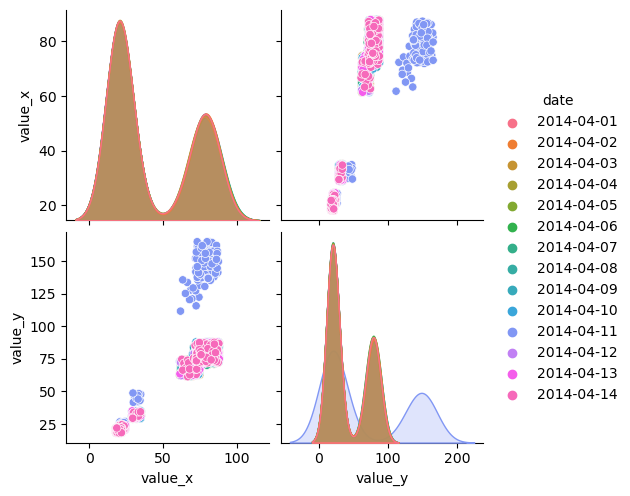

In [134]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# plot [25]
sns.pairplot(df3,
             vars= ['value_x','value_y'],
             hue = "date")

# sns.pairplot(df3,
#              vars= ['value_x','value_y'],
#              hue = "hour")

# sns.pairplot(df3,
#              vars= ['value_x','value_y'],
#              hue = "min")

## 2.4 Prepare training data

Normalizing or standardizing the training data is a common preprocessing step in machine learning that can help improve the performance of many algorithms. Normalization is typically performed by subtracting the mean of the training data from each value and then dividing the result by the standard deviation of the training data. 

### When To Normalize Data?

Normalization of data is a type of feature scaling and is only required when the data distribution is unknown or the data doesn't have Gaussian Distribution

## When To Standardize Data?

Standardized data is usually preferred when the data is being used for multivariate analysis i.e. when we want all the variables of comparable units. It is usually applied when the data has a bell curve i.e. it has gaussian distribution 

## Normalized Data Vs Standardized Data

- Normalization is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution.
- Normalization scales in a range circa [0,1] or [-1,1]. Standardization is not bounded by range.
- Normalization is highly affected by outliers. Standardization is slightly affected by outliers.
- Normalization is considered when the algorithms do not make assumptions about the data distribution. Standardization is used when algorithms make assumptions about the data distribution. [16] [17]

![NormalizedVsStandardized](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/Normalization_Standardization.png?raw=true)

### Normalized Data [Numenta Anomaly Benchmark(NAB) github](https://github.com/numenta/NAB) timeseries dataset

In [135]:
# df_small_noise mean
train_mean = df_small_noise.mean()
train_mean

value    42.438353
dtype: float64

In [136]:
# df_small_noise standard deviation
train_std = df_small_noise.std()
train_std

value    28.077122
dtype: float64

In [137]:
# Normalize df_train_vals
df_train_vals = (df_small_noise - train_mean) / train_std


To illustrate the intended output two new columns are added to the df_small_noise

In [138]:
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

# Data Quality and Preprocessing
# https://www.w3resource.com/pandas/dataframe/dataframe-head.php 
# Print the first 5 rows
df_small_noise.head()

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173


### Timeseries data without anomalies normalized

We will repeat the step above showing how the data is normalized into training data

The new normalized data will keep the timestamp and the 'div_std' is the value 

![Normalization_Timeseries_data_without_anomalies](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/Normalization_Timeseries_data_without_anomalies.png?raw=true)


In [139]:
# Data Quality and Preprocessing
# https://www.w3resource.com/pandas/dataframe/dataframe-head.php 
# Print the first 5 rows
df_train_vals.head()


,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [140]:
# Data Quality and Preprocessing
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution [14]
# Check count, min, max, mean and std
# https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
df_train_vals.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,value
count,4032
mean,-2.61654e-15
std,1
min,-0.870367
25%,-0.804818
50%,-0.74188
75%,1.17576
max,1.62188


### Plot normalized Timeseries data without anomalies

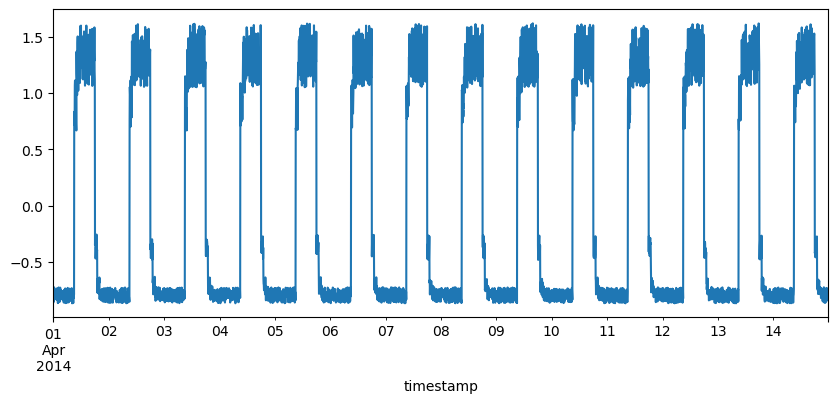

In [141]:
# Plot df_small_noise dataset timeline
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

Normalization scaled the data in a range circa [-0.87,1.62]. 

Normalization the dataset helped to reduce the scale of the training data. This can be particularly important when working with data that has a large dynamic range, as it can help to ensure that the model is not overly influenced by extreme values in the training data.

## 2.5 Create sequences

We now have to create a sequence by dividing the training data into chunks of a specific size and using these chunks **(window size)** as input to a machine learning model.

For example, suppose you have a time-series dataset with the following values:

            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

If you want to create sequences of three contiguous data values from this dataset, you could divide the data into the following chunks:

            [1, 2, 3]   
            [2, 3, 4]    
            [3, 4, 5]   
            [4, 5, 6]   
            [5, 6, 7]   
            [6, 7, 8]   
            [7, 8, 9]   
            [8, 9, 10]  

The following is an example of how to create a sequence by dividing the training data into chunks of a specific size

In [142]:
# Window list training data values
my_list = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example chunks **(window size)**
win_size = 3
# Length of L training data values
len(my_list)

12

In [143]:
# Number of windows from L.
# how many chunks **(window size)** will be produced
len(my_list) - win_size + 1

10

In [144]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(my_list) - win_size + 1):
    wins.append(my_list[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [145]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

## Why choose 288 as the Windows size?

![Time-Steps-288](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/Time-Steps-288.png?raw=true)

As can be seen from the df_train_vals.head() values are collected every 5 minutes over a 14 day period. **288 represents a single day**

-  24 * 60 / 5 = **288 timesteps per day** [1]
-  288 * 14 = **4032 data points** in total [1]

In [146]:
# Creating the windows size
window_size = 288

### Create sequences on df_train_vals

This section a function is used to create sequences on df_train_vals.

In [147]:
# Generated training sequences for use in the model. [4]
def windows(vals, N=window_size):
  # Create an empty List L
  L = []
  # Loop Through the list
  for i in range(len(vals) - N + 1):
    # Append to the L
    L.append(vals[i:i+N])
  # Return numpy stack
  return np.stack(L)


In [148]:
# Call function create sequences on df_train_vals and set to x_train
x_train = windows(df_train_vals)

In [149]:
# Data Quality and Preprocessing
# To verify create sequences
# Print out the first three values in thr training set
x_train[0][0], x_train[1][0], x_train[2][0]

(array([-0.85882857]), array([-0.72899302]), array([-0.84814772]))

In [150]:
# Data Quality and Preprocessing
# Print the first three values in df_train_vals
df_train_vals.iloc[0]['value'], df_train_vals.iloc[1]['value'], df_train_vals.iloc[2]['value']

(-0.8588285706437563, -0.728993019611064, -0.8481477220334223)

In [151]:
# Data Quality and Preprocessing
# Check the dimensions
x_train.shape

(3745, 288, 1)

## Build a model

We will build a convolutional reconstruction autoencoder model. The model will take input of shape `(batch_size, sequence_length, num_features)` and return output of the same shape. In this case, `sequence_length` is 288 and `num_features` is 1.

In [152]:
# Input of shape `(batch_size, sequence_length, num_features)'
# (3745, 288, 1)
x_train.shape

(3745, 288, 1)

## 2.6 Create the Model

### keras.Sequential

Keras Sequential API is a simple way to create a model layer by layer for many machine learning problems. The Sequential API allows you to create a model by adding layers to it in a sequential manner, starting with the input layer and ending with the output layer. [22]


### Basics of Keras Layers

Keras Layers are the functional building blocks of Keras Models. Each layer is created using numerous layer_() functions. These layers are fed with input information, they process this information, do some computation and hence produce the output.

Further, this output of one layer is fed to another layer as its input. [19]

![input-layer](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/input-layer.png?raw=true)

### keras.layers.Input

Input layer specifies the sequence length (288) and features (1) of the input data that the model will receive. Keras input layer itself is not a layer, but rather a tensor that represents the input data. The input layer is the starting point of the model, and it is followed by one or more hidden layers, which perform computations on the input data and produce an output.

As we are using 1D convolutions and recurrent layers typically use a tensor with shape (batch_size, sequence_length, features) as input. This tensor represents a batch of data, where each element in the batch is a sequence of length sequence_length with features dimensions. [20] [21] 

We can specify the dimensional information using shape, a tuple of integers. For example, (4,2) represent matrix with four rows and two columns. [23]

In [153]:
# (4,2) represent matrix [23]
shape = (4, 2)
input = np.zeros(shape) 
input

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### keras.layers.Conv1D

Keras sequential model and add a one-dimensional convolutional layer. 

The example below uses numpy recreating chunks **(window size)** and have the **'conv1d_filter'** slide over each chunk

In [154]:
# 1D Convolution in Numpy

conv1d_filter = np.array([1,2,3])
data = np.array([1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5])
result = []

for i in range(10):
    print(data[i:i+3], "*", conv1d_filter, "=", data[i:i+3] * conv1d_filter)
    result.append(np.sum(data[i:i+3] * conv1d_filter))
    
print("Conv1d output", result)


[1 1 2] * [1 2 3] = [1 2 6]
[1 2 4] * [1 2 3] = [ 1  4 12]
[2 4 5] * [1 2 3] = [ 2  8 15]
[4 5 6] * [1 2 3] = [ 4 10 18]
[5 6 7] * [1 2 3] = [ 5 12 21]
[6 7 1] * [1 2 3] = [ 6 14  3]
[7 1 2] * [1 2 3] = [7 2 6]
[1 2 3] * [1 2 3] = [1 4 9]
[2 3 4] * [1 2 3] = [ 2  6 12]
[3 4 5] * [1 2 3] = [ 3  8 15]
Conv1d output [9, 17, 25, 32, 38, 23, 15, 14, 20, 26]


The input data is **12 items**. The 1D convolution slides a **size 3 window** across the data without padding. Thus, the **result is an array of 10 values**. In Keras/Tensorflow terminology I believe the input shape is (1, 12, 1) i.e. one sample of 12 items, each item having one channel (feature). The Convolution1D shape is (3, 1) i.e. 1 filter of size 3. [28]

![keras.layers.Conv1D](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/keras.layers.Conv1D?raw=true)

In [155]:
# Printing Conv1d output value
print("Conv1d output", result)

Conv1d output [9, 17, 25, 32, 38, 23, 15, 14, 20, 26]


In [175]:

toyX = np.array([1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]).reshape(1,12,1)
toyY = np.array([9, 17, 25, 32, 38, 23, 15, 14, 20, 26]).reshape(1,10,1)

toy = keras.Sequential([
 keras.layers.Conv1D(filters=1, kernel_size=3, strides=1, padding='valid', use_bias=False, input_shape=(12,1), name='c1d', activation="relu")
])
toy.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae')

#toy.summary()
print("Initial random guess conv weights", toy.layers[0].get_weights()[0].reshape(3,))


Initial random guess conv weights [-0.9018159   0.79120326  0.77585363]


In [177]:
for i in range(2000):
  h = toy.fit(toyX, toyY, verbose=0)
  if i%20 == 0:
    print("{:3d} {} \t {}".format(i, toy.layers[0].get_weights()[0][:,0,0], h.history))

  0 [-0.7008185   0.9922007   0.97685105] 	 {'loss': [16.67381477355957]}
 20 [-0.68081874  1.0122012   0.9968508 ] 	 {'loss': [16.481813430786133]}
 40 [-0.660819   1.0322021  1.0168515] 	 {'loss': [16.28980827331543]}
 60 [-0.64081925  1.052203    1.0368525 ] 	 {'loss': [16.09780502319336]}
 80 [-0.6208195  1.072204   1.0568534] 	 {'loss': [15.905797958374023]}
100 [-0.60081977  1.0922049   1.0768543 ] 	 {'loss': [15.71379280090332]}
120 [-0.58082    1.1122059  1.0968553] 	 {'loss': [15.5217866897583]}
140 [-0.5608203  1.1322068  1.1168562] 	 {'loss': [15.329780578613281]}
160 [-0.54082054  1.1522077   1.1368572 ] 	 {'loss': [15.137773513793945]}
180 [-0.5208208  1.1722087  1.1568581] 	 {'loss': [14.945768356323242]}
200 [-0.500578   1.1922351  1.1769061] 	 {'loss': [14.750091552734375]}
220 [-0.47675422  1.212645    1.1976577 ] 	 {'loss': [14.522096633911133]}
240 [-0.4520797  1.2331557  1.218593 ] 	 {'loss': [14.289706230163574]}
260 [-0.4276141  1.2536526  1.2395009] 	 {'loss': [1

### keras.layers.Dropout

Dropout layers are important in training CNNs because they prevent overfitting on the training data. If they aren’t present, the first batch of training samples influences the learning in a disproportionately high manner. This, in turn, would prevent the learning of features that appear only in later samples or batches

![withdropout.jpg](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/withdropout.jpg?raw=true)

![withoutdropout.jpg](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/withoutdropout.jpg?raw=true)


Say we show ten pictures of a circle, in succession, to a CNN during training. The CNN won’t learn that straight lines exist; as a consequence, it’ll be pretty confused if we later show it a picture of a square. We can prevent these cases by adding Dropout layers to the network’s architecture, in order to prevent overfitting. [29]


### keras.layers.Conv1DTranspose

The need for transposed convolutions generally arises from the desire to use a transformation going in the opposite direction of a normal convolution, i.e., from something that has the shape of the output of some convolution to something that has the shape of its input while maintaining a connectivity pattern that is compatible with said convolution

In [43]:
# Create the layers
layers = [

    # Input layer specifies the sequence length (288) and features (1)
    keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),

    # https://keras.io/api/layers/convolution_layers/convolution1d/
    # https://shivapriya-katta.medium.com/time-series-forecasting-using-conv1d-lstm-multiple-timesteps-into-future-acc684dcaaa
    keras.layers.Conv1D( filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),

    # https://keras.io/api/layers/regularization_layers/dropout/
    # https://www.oreilly.com/library/view/machine-learning-for/9781786469878/252b7560-e262-49c4-9c8f-5b78d2eec420.xhtml
    keras.layers.Dropout(rate=0.2),

    # https://keras.io/api/layers/convolution_layers/convolution1d/
    keras.layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),

    # https://keras.io/api/layers/convolution_layers/convolution1d_transpose/ 
    # https://www.geeksforgeeks.org/python-tensorflow-tf-keras-layers-conv1dtranspose-function/
    keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),

    # https://keras.io/api/layers/regularization_layers/dropout/
    keras.layers.Dropout(rate=0.2),

    # https://keras.io/api/layers/convolution_layers/convolution1d_transpose/
    keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),

    # https://keras.io/api/layers/convolution_layers/convolution1d_transpose/
    keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),

]

In [44]:
# https://www.tensorflow.org/tutorials/images/cnn
# 
model = keras.Sequential(layers)

In [45]:
# Explain keras.optimizers.Adam

optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [46]:
model.compile(optimizer=optimizer, loss="mse")

In [47]:
# This is summary of the model created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

## 2.7 Train the model
Please note that we are using `x_train` as both the input and the output since this is a reconstruction model.

In [48]:
# Add NEW DR
# training data and is the input and output model

history = model.fit(
    x_train,
    x_train,
    epochs=200,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/200
27/27 [==============================] - 3s 92ms/step - loss: 0.4715 - val_loss: 0.0786
Epoch 2/200
27/27 [==============================] - 2s 86ms/step - loss: 0.0755 - val_loss: 0.0433
Epoch 3/200
27/27 [==============================] - 2s 82ms/step - loss: 0.0589 - val_loss: 0.0356
Epoch 4/200
27/27 [==============================] - 2s 82ms/step - loss: 0.0490 - val_loss: 0.0283
Epoch 5/200
27/27 [==============================] - 2s 81ms/step - loss: 0.0422 - val_loss: 0.0260
Epoch 6/200
27/27 [==============================] - 2s 82ms/step - loss: 0.0379 - val_loss: 0.0244
Epoch 7/200
27/27 [==============================] - 2s 66ms/step - loss: 0.0346 - val_loss: 0.0224
Epoch 8/200
27/27 [==============================] - 2s 92ms/step - loss: 0.0320 - val_loss: 0.0228
Epoch 9/200
27/27 [==============================] - 2s 87ms/step - loss: 0.0297 - val_loss: 0.0206
Epoch 10/200
27/27 [==============================] - 2s 77ms/step - loss: 0.0279 - val_loss: 0.0205

In [ ]:
history.history["loss"]

In [ ]:
history.history["val_loss"]

Let's plot training and validation loss to see how the training went.

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

## Detecting anomalies
We will detect anomalies by determining how well our model can reconstruct
the input data.
1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.

In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

In [ ]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [ ]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

### Compare recontruction
Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [ ]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

### Prepare test data



In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [ ]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

In [ ]:
# 
x_test_pred = model.predict(x_test)

In [ ]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

In [ ]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

## Plot anomalies
We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:
Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:
- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9
All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [ ]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [ ]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

In [ ]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3>References</h3>
 
[1] https://keras.io/examples/timeseries/timeseries_anomaly_detection/

[2] https://towardsai.net/p/l/what-is-tensorflow-and-how-does-it-work

[3] https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras

[4] https://github.com/ianmcloughlin/2223-S1-machine-learn-stats

[5] https://www.geeksforgeeks.org/single-neuron-neural-network-python/

[6] https://machinelearningmastery.com/autoencoder-for-classification/

[7] https://analyticsindiamag.com/how-to-implement-convolutional-autoencoder-in-pytorch-with-cuda/

[8] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9040363/

[9] https://github.com/keras-team/keras/blob/master/README.md

[10] https://www.numenta.com/resources/htm/numenta-anomoly-benchmark/

[11] https://github.com/numenta/NAB

[12] https://towardsdatascience.com/why-you-should-be-using-pandas-dataframes-for-keras-trainings-on-image-classification-problems-db220134cbc6

[13] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

[14] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

[15] https://www.educative.io/answers/how-to-compare-two-dataframes-in-pandas

[16] https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed

[17] https://www.naukri.com/learning/articles/normalization-and-standardization/

[18] https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

[19] https://techvidvan.com/tutorials/keras-layers/

[20] https://keras.io/api/layers/core_layers/input/

[21] https://ressources.labomedia.org/keras_input_explanation

[22] https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/

[23] https://www.tutorialspoint.com/keras/keras_layers.htm

[24] https://keras.io/api/layers/regularization_layers/dropout/

[25] https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22

[26] https://heartbeat.comet.ml/data-preprocessing-and-visualization-implications-for-your-machine-learning-model-8dfbaaa51423

[27] https://jcsites.juniata.edu/faculty/rhodes/ml/datapreprocessing.htm

[28] http://www.jussihuotari.com/2017/12/20/spell-out-convolution-1d-in-cnns/

[29] https://www.baeldung.com/cs/ml-relu-dropout-layers

[30] https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1DTranspose

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3>END</h3>

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

https://www.kaggle.com/code/adithya44/anomaly-detection-with-time-series-forecasting

https://www.google.com/search?client=firefox-b-d&q=time+series+anomaly+detection+kaggle

https://www.google.com/search?client=firefox-b-d&q=Time+Series+anomaly+detection+using+Keras+explain&spell=1&sa=X&ved=2ahUKEwj3xLa67qT7AhX-RkEAHTSJDOoQBSgAegQIJBAB&biw=2560&bih=1287&dpr=1.5

https://neptune.ai/blog/anomaly-detection-in-time-series

https://www.google.com/search?client=firefox-b-d&q=examples+of+Time+Series+anomaly+detection+keras&spell=1&sa=X&ved=2ahUKEwjCgv3U7qT7AhWHWMAKHVNXA6MQBSgAegQIOhAB&biw=2560&bih=1287&dpr=1.5

https://valueml.com/anomaly-detection-in-time-series-data-using-keras/

https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9

https://huggingface.co/keras-io/timeseries-anomaly-detection?data=%7B%7D

https://www.youtube.com/watch?v=H4J74KstHTE

https://curiousily.com/posts/anomaly-detection-in-time-series-with-lstms-using-keras-in-python/
